# Tarea #2

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
dataHP = pd.read_csv('./data/train_HP.csv')
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataHP.shape

(1460, 81)

In [4]:
dataHP.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Extraemos columnas con NAN

In [5]:
cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0)]

In [6]:
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
dataHP[cols_con_na].dtypes #tipos de dato de las columnas con NANs

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [8]:
prop_nan_per_col = dataHP[cols_con_na].isnull().mean() #proporcion de nans
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [9]:
prop_nan_per_col_res = prop_nan_per_col[prop_nan_per_col < 0.2]

In [10]:
prop_nan_per_col_res

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [11]:
dataHP[prop_nan_per_col_res.index.to_list()].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [12]:
dataset = dataHP[prop_nan_per_col_res.index.to_list()].copy()

In [13]:
def getColumnTypes(dataset):
    """
    Esta funcion extrae el tipo de dominio de las columnas de un dataset
    Entrada: dataset
    Salida: Tupla con arreglos que cotienen nombres de las columnas
    """

    continuas = []
    discretas = []
    categoricas = []

    for col in dataset.columns:
        if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
            if( len(dataset[col].unique()) > 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [14]:
continuas, discretas, categoricas = getColumnTypes(dataset)
print(continuas)
print(discretas)
print(categoricas)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
[]
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


# Continuas

In [15]:
def imputacion_continuas(df,column_to_impute):
    media = df[column_to_impute].mean()
    mediana = df[column_to_impute].median()

    df['Mean'] = np.round(df[column_to_impute].fillna(media))
    df['Median'] = np.round(df[column_to_impute].fillna(mediana))
    
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")

    fig = plt.figure()
    df[column_to_impute].plot.density(color='red', label='Original')
    df['Mean'].plot.density(color='blue', label='Media')
    df['Median'].plot.density(color='green', label='Mediana')
    plt.legend()
    
    fig = plt.figure()
    df[[column_to_impute,'Mean','Median']].boxplot()
    plt.show()

## LotFrontage

Media: 70.04995836802665
Mediana: 69.0


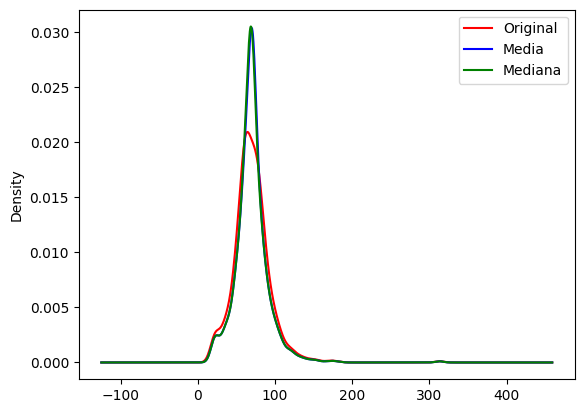

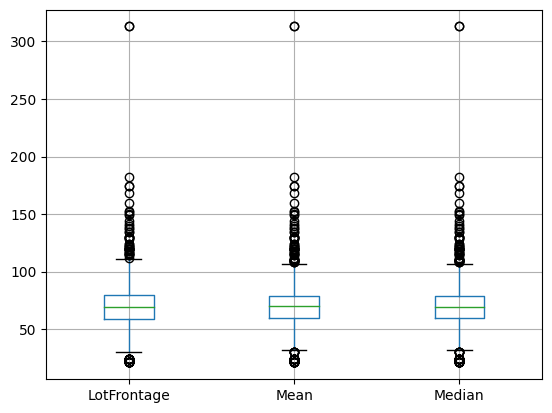

In [16]:
imputacion_continuas(dataset.copy(), 'LotFrontage')

## MasVnrArea

Media: 103.68526170798899
Mediana: 0.0


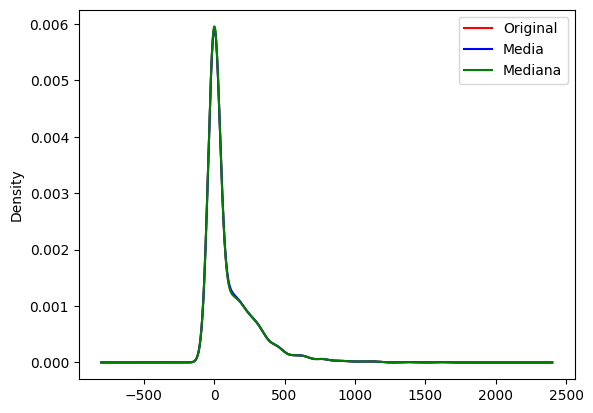

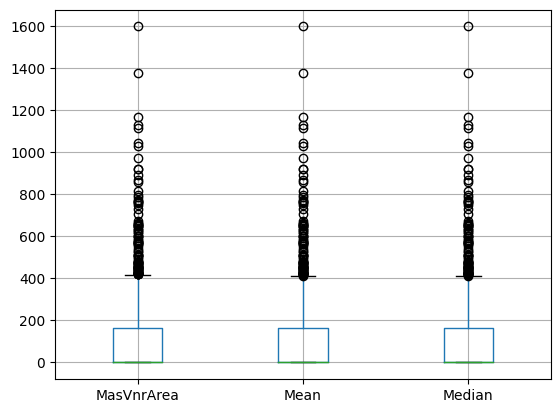

In [17]:
imputacion_continuas(dataset,'MasVnrArea')

In [18]:
dataHP['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

MasVnrArea - relacionado tambien con MasVnrType, donde el area nula significa que no hay masonry

In [19]:
dataHP[['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
0,196.0,BrkFace
1,0.0,None
2,162.0,BrkFace
3,0.0,None
4,350.0,BrkFace
...,...,...
1455,0.0,None
1456,119.0,Stone
1457,0.0,None
1458,0.0,None


In [20]:
dataHP[['MasVnrArea','MasVnrType']].loc[ dataHP['MasVnrType'].isnull()]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


## GarageYrBlt

Garage - caso especial, la cantidad de nulos coincide con las variables categoricas relacionadas al garage <br>
los NaNs entonces simplemente existen cuando la cada no tiene garage <br>
El año la imputación la haré colocando en GarageYrBlt el mismo año de construcción de la casa <br>

In [21]:
dataHP.loc[dataHP['GarageYrBlt'].isnull(),'GarageYrBlt'] = dataHP['YearBuilt']

In [22]:
imp_continuas = [
    ('LotFrontage', 'Mean'),
    ('MasVnrArea', 'Median')
]

In [23]:
def apply_impute_continuous(df, imp_list):
    for var in imp_list:
        if(var[1] == 'Mean'):
            val_impute = df[var[0]].mean()
        else: #Mediana
            val_impute = df[var[0]].median()
        df[var[0]] = np.round(df[var[0]].fillna(val_impute))

In [24]:
apply_impute_continuous(dataHP, imp_continuas)

In [25]:
dataHP[continuas].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

# Categoricas

In [26]:
categoricas

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [27]:
def imputacion_categoricas(df, column_to_impute, y_col):    
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 5))
    
    df[column_to_impute].value_counts().plot.bar(ax=ax1)
    
    values = df[column_to_impute].dropna().unique()
    print(values)
    df.loc[df[column_to_impute].isnull()][y_col].plot(ax=ax2, kind="kde", color="black", label="Missings")
    
    for value in values:
        df[df[column_to_impute] == value][y_col].plot(ax=ax2, kind="kde", label=value)
        
    sns.boxplot(x=df[column_to_impute], y=df[y_col], ax=ax3)
    
    ax2.legend()
    plt.show()

## MasVnrType

In [28]:
dataHP['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

['BrkFace' 'None' 'Stone' 'BrkCmn']


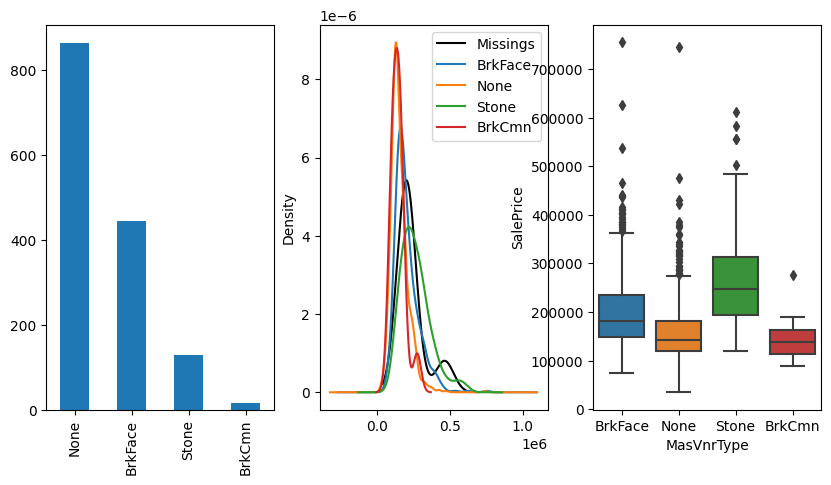

In [29]:
imputacion_categoricas(dataHP.copy(),'MasVnrType','SalePrice')

MasVnrType sustituir NaN con None = no hay

In [30]:
dataHP[['Electrical','SalePrice']].loc[dataHP['Electrical'].isnull()]

,Electrical,SalePrice
1379,NaN,167500


<Axes: xlabel='Electrical', ylabel='SalePrice'>

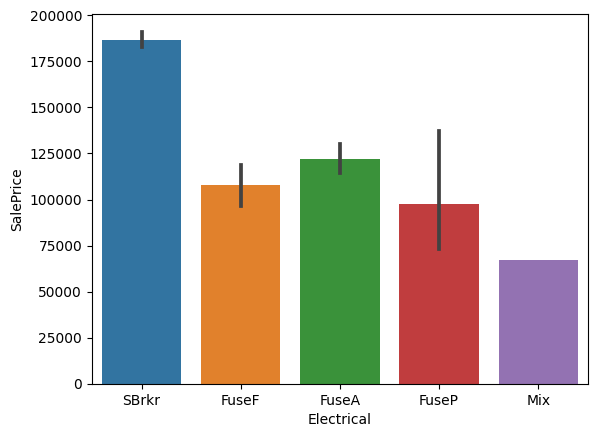

In [31]:
fig, ax = plt.subplots()
sns.barplot(data=dataHP, x='Electrical', y='SalePrice')

Para Eletrical es un unico valor NaN <br>
Sustituyo el valor por el que tiene una media de SalePrice similar a la del precio en esa fila

In [32]:
basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [33]:
dataHP[basement].isnull().mean()

BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
dtype: float64

In [34]:
dataHP['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [35]:
dataHP[['BsmtQual', 'BsmtCond', 'BsmtFinType1','BsmtExposure', 'BsmtFinType2']].loc[ dataHP['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtExposure,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [36]:
dataHP[['BsmtExposure', 'BsmtFinType2']].loc[ dataHP['BsmtExposure'].isnull()]

,BsmtExposure,BsmtFinType2
17,NaN,NaN
39,NaN,NaN
90,NaN,NaN
102,NaN,NaN
156,NaN,NaN
182,NaN,NaN
259,NaN,NaN
342,NaN,NaN
362,NaN,NaN
371,NaN,NaN


## BsmtQual

['Gd' 'TA' 'Ex' 'Fa']


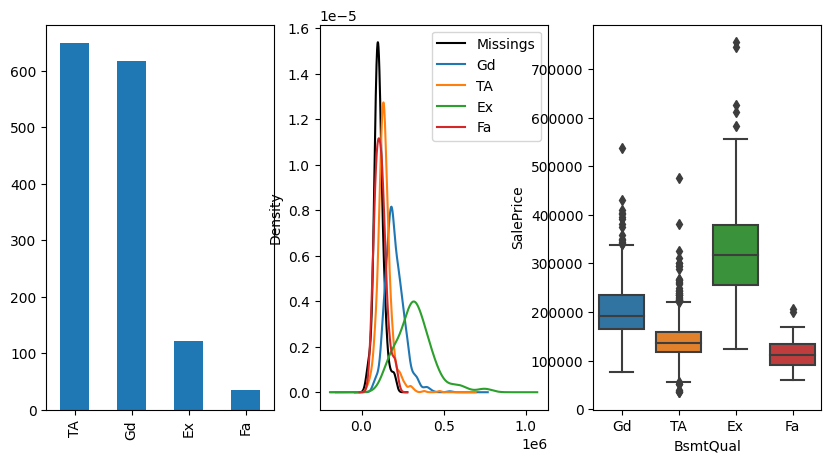

In [37]:
imputacion_categoricas(dataHP.copy(),'BsmtQual','SalePrice')

['TA' 'Gd' 'Fa' 'Po']


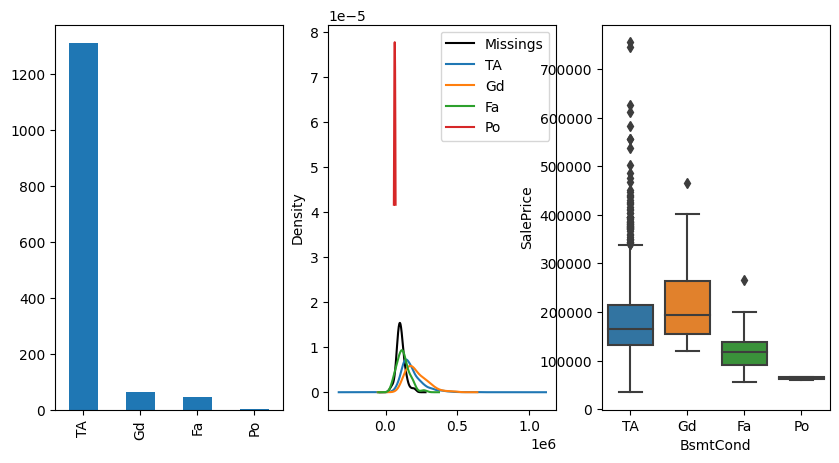

In [38]:
imputacion_categoricas(dataHP.copy(),'BsmtCond','SalePrice')

['No' 'Gd' 'Mn' 'Av']


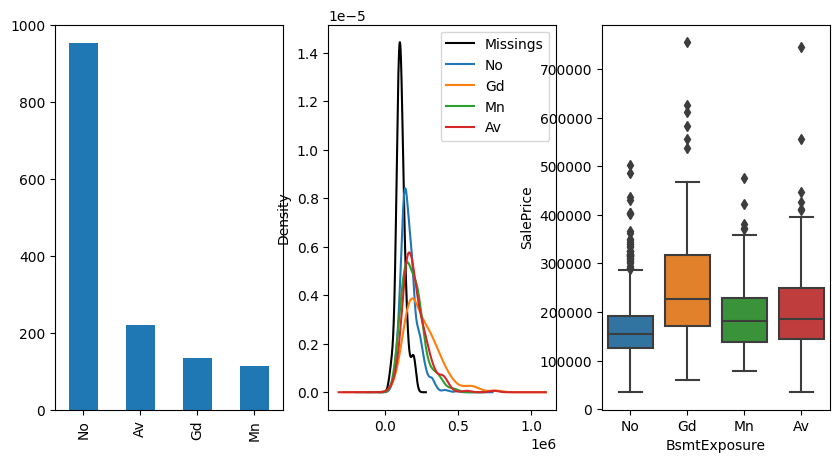

In [39]:
imputacion_categoricas(dataHP.copy(),'BsmtExposure','SalePrice')

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']


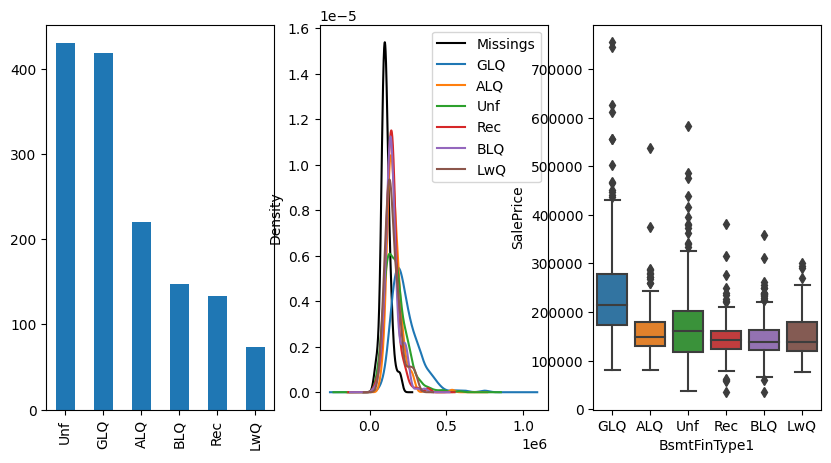

In [40]:
imputacion_categoricas(dataHP.copy(),'BsmtFinType1','SalePrice')

['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']


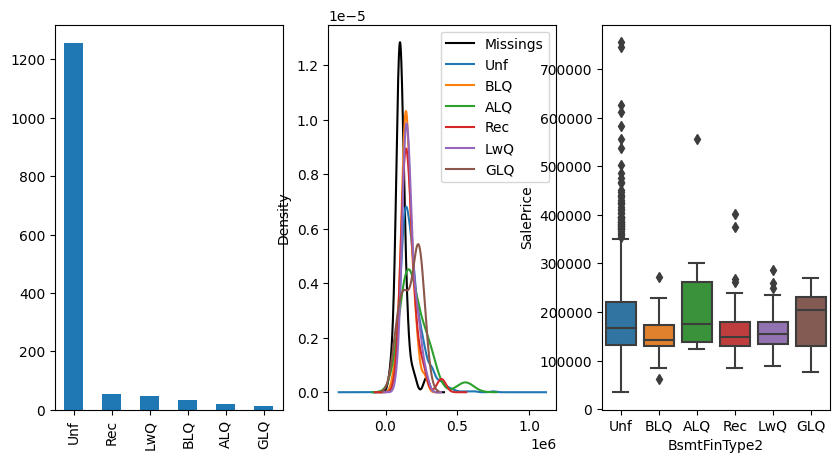

In [41]:
imputacion_categoricas(dataHP.copy(),'BsmtFinType2','SalePrice')

## Garage

In [42]:
garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageArea']

In [43]:
dataHP['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [44]:
dataHP['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [45]:
dataHP['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [46]:
dataHP['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [47]:
dataHP['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [48]:
dataHP[garage].loc[ dataHP['GarageArea'] == 0]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageArea
39,NaN,NaN,NaN,NaN,0
48,NaN,NaN,NaN,NaN,0
78,NaN,NaN,NaN,NaN,0
88,NaN,NaN,NaN,NaN,0
89,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,0
1407,NaN,NaN,NaN,NaN,0
1449,NaN,NaN,NaN,NaN,0
1450,NaN,NaN,NaN,NaN,0


Categoricas donde no hay garage <br>
Para las variables categoricas, estas tienen NaN cuando el area de garage (variable disponible en el dataset es 0), entonces para estas variables se crea la categoria de "None" como tal en lugar del NaN

In [49]:
dataHP.loc[dataHP['GarageArea'] == 0, 'GarageType'] = 'None'

In [50]:
dataHP.loc[dataHP['GarageArea'] == 0, ['GarageType','GarageFinish','GarageQual','GarageCond']] = 'None'

In [51]:
dataHP[garage].loc[ dataHP['GarageArea'] == 0]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageArea
39,None,None,None,None,0
48,None,None,None,None,0
78,None,None,None,None,0
88,None,None,None,None,0
89,None,None,None,None,0
...,...,...,...,...,...
1349,None,None,None,None,0
1407,None,None,None,None,0
1449,None,None,None,None,0
1450,None,None,None,None,0


In [52]:
dataHP[garage].isnull().mean()

GarageType      0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
GarageArea      0.0
dtype: float64

In [53]:
imp_categoricas = [
    ('MasVnrType', 'None'),
    ('Electrical', 'SBrkr'),
    ('BsmtQual', 'TA'),
    ('BsmtCond','Fa'),
    ('BsmtExposure','No'),
    ('BsmtFinType1','Rec'),
    ('BsmtFinType2','BLQ')
]

In [54]:
def apply_imputacion_categorica(df, cat_app):
    """
    Funcion que aplica las sustituciones enlistadas
    cat_app = lista de duplas con el nombre de la columna y el valor que se le debe colocar a los NaNs
    """
    for cat in cat_app:
        df[cat[0]].fillna(cat[1],inplace=True) #imputacion de variable categorica

In [55]:
apply_imputacion_categorica(dataHP,imp_categoricas)

In [56]:
dataHP[cols_con_na].isnull().mean()

LotFrontage     0.000000
Alley           0.937671
MasVnrType      0.000000
MasVnrArea      0.000000
BsmtQual        0.000000
BsmtCond        0.000000
BsmtExposure    0.000000
BsmtFinType1    0.000000
BsmtFinType2    0.000000
Electrical      0.000000
FireplaceQu     0.472603
GarageType      0.000000
GarageYrBlt     0.000000
GarageFinish    0.000000
GarageQual      0.000000
GarageCond      0.000000
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [57]:
(dataHP[cols_con_na].isnull().mean() > 0.2)

LotFrontage     False
Alley            True
MasVnrType      False
MasVnrArea      False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
Electrical      False
FireplaceQu      True
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageQual      False
GarageCond      False
PoolQC           True
Fence            True
MiscFeature      True
dtype: bool

Eliminar columnas con proporcion de nulls arriba del 20%:

In [58]:
dataHP = dataHP.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)

# Codificacion de variables categoricas

In [59]:
def getCategoryVars(dataset):
    cat_colnames = []
    colnames = dataHP.columns
    for col in colnames:
        if(dataHP[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

In [60]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [61]:
len(cat_cols)

38

In [62]:
for cat in cat_cols:
    uvalues =  dataHP[cat].unique()
    print(f"Variable: {cat} -- values: {uvalues}")

Variable: MSZoning -- values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Variable: Street -- values: ['Pave' 'Grvl']
Variable: LotShape -- values: ['Reg' 'IR1' 'IR2' 'IR3']
Variable: LandContour -- values: ['Lvl' 'Bnk' 'Low' 'HLS']
Variable: Utilities -- values: ['AllPub' 'NoSeWa']
Variable: LotConfig -- values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Variable: LandSlope -- values: ['Gtl' 'Mod' 'Sev']
Variable: Neighborhood -- values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Variable: Condition1 -- values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Variable: Condition2 -- values: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Variable: BldgType -- values: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Variable: HouseStyle -- values: ['2Story' '1Story' '1.5Fi

In [63]:
#one hot - variables con pocos valores posibles
cat_one_hot = ['Street', 'Utilities', 'LandSlope', 'BsmtExposure', 'CentralAir', 'PavedDrive']

In [64]:
#freq - variables con mayor cantidad de valores disponibles
cat_freq = [x for x in cat_cols if x not in cat_one_hot]

In [65]:
cat_freq

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SaleCondition']

In [66]:
def one_hot_feature(df, feature):
    """
    Funcion para hacer el one hot encoding
    feature = columna sobre la que se debe hacer el one hot encoding
    """
    dummies = pd.get_dummies(df[[feature]])
    dummies.add_prefix(f"{feature}__")
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature], axis=1)
    return res

In [67]:
def freq_encode(df, feature):
    """
    Funcion para hacer el encoding por frecuencia
    feature = columna sobre la que se debe hacer el encoding
    """
    freq_mapper = (df[feature].value_counts().sort_values(ascending=False)).to_dict()
    df[feature] = df[feature].map(freq_mapper)
    return df

In [68]:
for cat in cat_one_hot:
    dataHP = one_hot_feature(dataHP.copy(), cat)

In [69]:
for cat in cat_freq:
    dataHP = freq_encode(dataHP.copy(),cat)

In [70]:
dataHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   int64  
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   LotShape          1460 non-null   int64  
 6   LandContour       1460 non-null   int64  
 7   LotConfig         1460 non-null   int64  
 8   Neighborhood      1460 non-null   int64  
 9   Condition1        1460 non-null   int64  
 10  Condition2        1460 non-null   int64  
 11  BldgType          1460 non-null   int64  
 12  HouseStyle        1460 non-null   int64  
 13  OverallQual       1460 non-null   int64  
 14  OverallCond       1460 non-null   int64  
 15  YearBuilt         1460 non-null   int64  
 16  YearRemodAdd      1460 non-null   int64  


# Continuacion -- Tarea #2

# Outliers

In [72]:
def getColumnTypes(dataset):
    """
    Esta funcion extrae el tipo de dominio de las columnas de un dataset
    Entrada: dataset
    Salida: Tupla con arreglos que cotienen nombres de las columnas
    """

    continuas = []
    discretas = []
    categoricas = []

    for col in dataset.columns:
        if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
            if( len(dataset[col].unique()) > 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [73]:
continuas, discretas, categoricas = getColumnTypes(dataHP)

In [75]:
def detectOutliersLimits(dataset, col):
    """
    Descripcion: Calcula los limites superiores e inferiores para deteccion de outliers
    Input: dataset -> pandas dataframe, col -> string nombre de columna
    Output: tupla de floats con los limites inferior y superior
    """
    
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - IQR*1.75
    LS = dataset[col].quantile(0.75) + IQR*1.75
    
    return LI, LS

In [76]:
continuas

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [78]:
# Variables que de tener valores negativos, tiene sentido setearlas a cero
continuas_rev = [
    'LotFrontage', # Linear feet of street connected to property
    'LotArea', #Lot size in square feet 
    'YearBuilt', #Original construction date
    'YearRemodAdd', #Remodel date
    'MasVnrArea', #Masonry veneer area in square feet
    'BsmtFinSF1', #Type 1 finished square feet
    'BsmtFinSF2', #Type 2 finished square feet
    'BsmtUnfSF', #Unfinished square feet of basement area
    '1stFlrSF', #First Floor square feet
    '2ndFlrSF', #Second floor square feet
    'GrLivArea', #Above grade (ground) living area square feet
    'GarageYrBlt', #Year garage was built
    'GarageArea', #Size of garage in square feet
    'WoodDeckSF', #Wood deck area in square feet
    'OpenPorchSF', #Open porch area in square feet
    'EnclosedPorch', #Enclosed porch area in square feet
    'ScreenPorch', #Screen porch area in square feet
    'SalePrice'
]

In [81]:
for continua in continuas:
    if continua != 'Id':
        LI, LS = detectOutliersLimits(dataHP, continua)
        print(f'{continua} -- LI: {LI}  LS: {LS}')

LotFrontage -- LI: 26.75  LS: 112.25
LotArea -- LI: 469.5  LS: 18685.5
YearBuilt -- LI: 1873.5  LS: 2080.5
YearRemodAdd -- LI: 1902.25  LS: 2068.75
MasVnrArea -- LI: -287.4375  LS: 451.6875
BsmtFinSF1 -- LI: -1246.4375  LS: 1958.6875
BsmtFinSF2 -- LI: 0.0  LS: 0.0
BsmtUnfSF -- LI: -800.75  LS: 1831.75
TotalBsmtSF -- LI: -83.625  LS: 2177.625
1stFlrSF -- LI: -9.1875  LS: 2282.4375
2ndFlrSF -- LI: -1274.0  LS: 2002.0
GrLivArea -- LI: -3.1875  LS: 2909.4375
GarageYrBlt -- LI: 1885.5  LS: 2074.5
GarageArea -- LI: -88.125  LS: 998.625
WoodDeckSF -- LI: -294.0  LS: 462.0
OpenPorchSF -- LI: -119.0  LS: 187.0
EnclosedPorch -- LI: 0.0  LS: 0.0
ScreenPorch -- LI: 0.0  LS: 0.0
SalePrice -- LI: -17068.75  LS: 361043.75


In [100]:
#setear a cero
for continua in continuas:
    if continua != 'Id':
        LI, LS = detectOutliersLimits(dataHP, continua)
        if(LI < 0):
            LI = 0
        data[continua] = np.where(dataHP[continua] > LS, LS, np.where(dataHP[continua] < LI, LI, dataHP[continua]))

In [102]:
def plotDistBoxQQ(dataset,col):
    """
    Descripcion: Muestra las graficas de distribucion, boxplot y qq-plot para detectar outliers
    Input: dataset -> pandas dataframe, col -> string con nombre de columna
    output: visualizacion de plots
    """

    plt.figure(figsize=(20,6))

    plt.subplot(1,3,1) #1 lienzo de 3 columnas y una fila
    sns.distplot(dataset[col], bins=30)
    plt.title('Histograma y Densidad')

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title('Boxplot')


    plt.subplot(1,3,3)
    stats.probplot(dataset[col], dist='norm', plot=plt)
    plt.title("Q-Q Plot")

In [104]:
import warnings
warnings.filterwarnings('ignore')

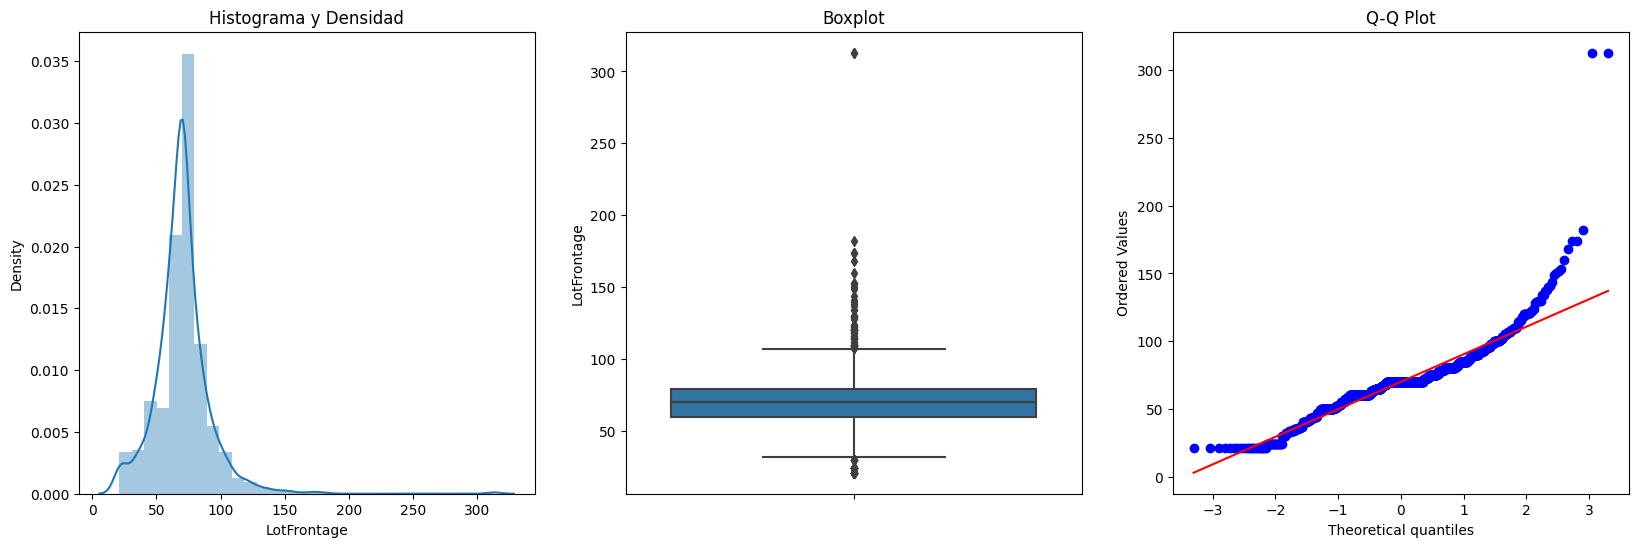

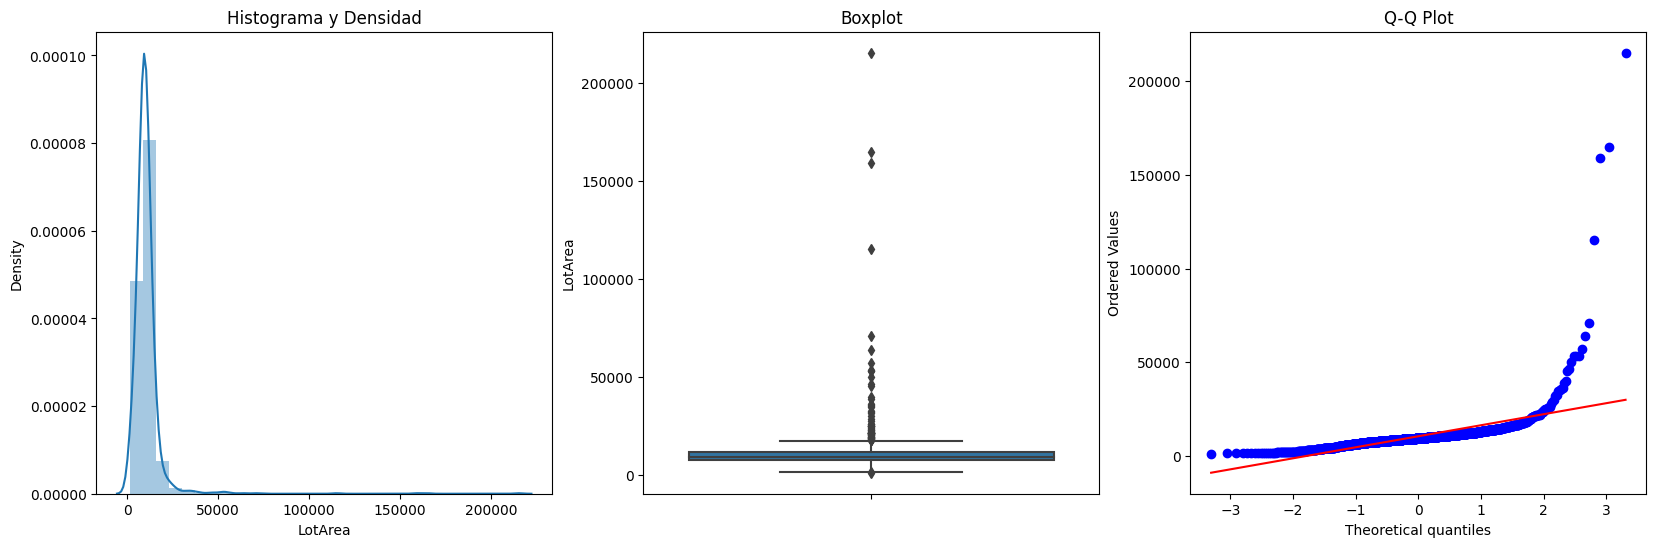

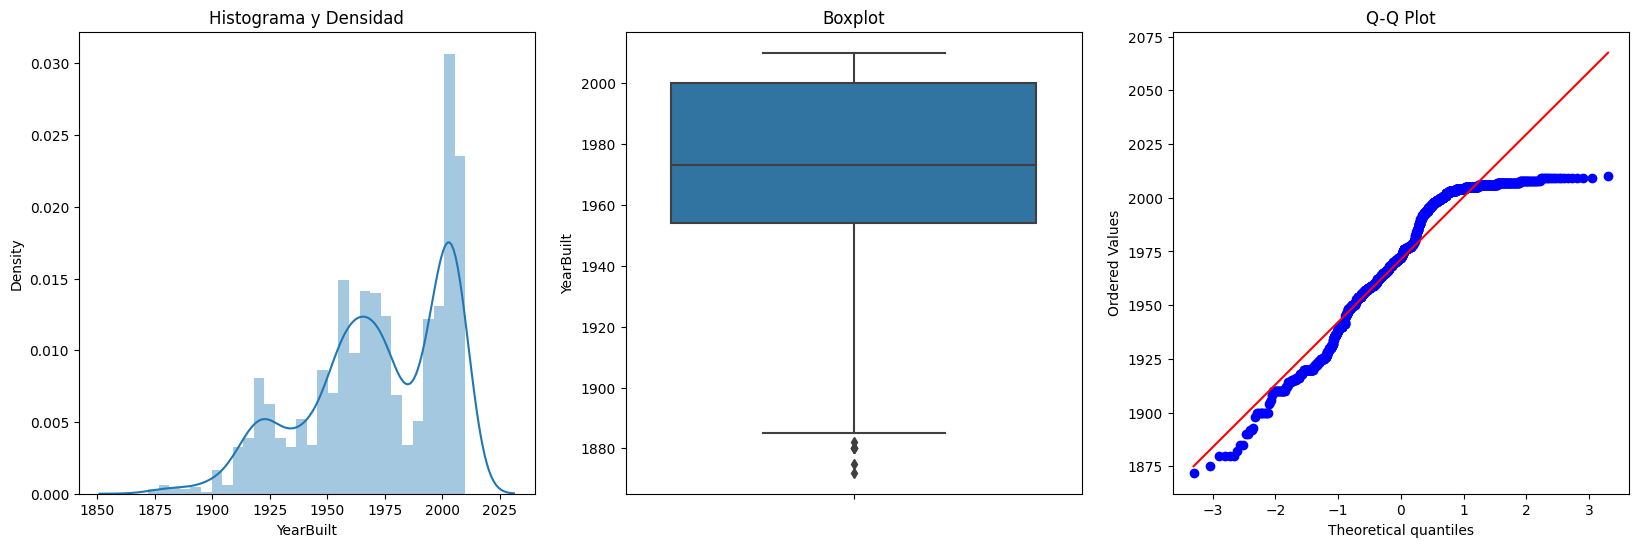

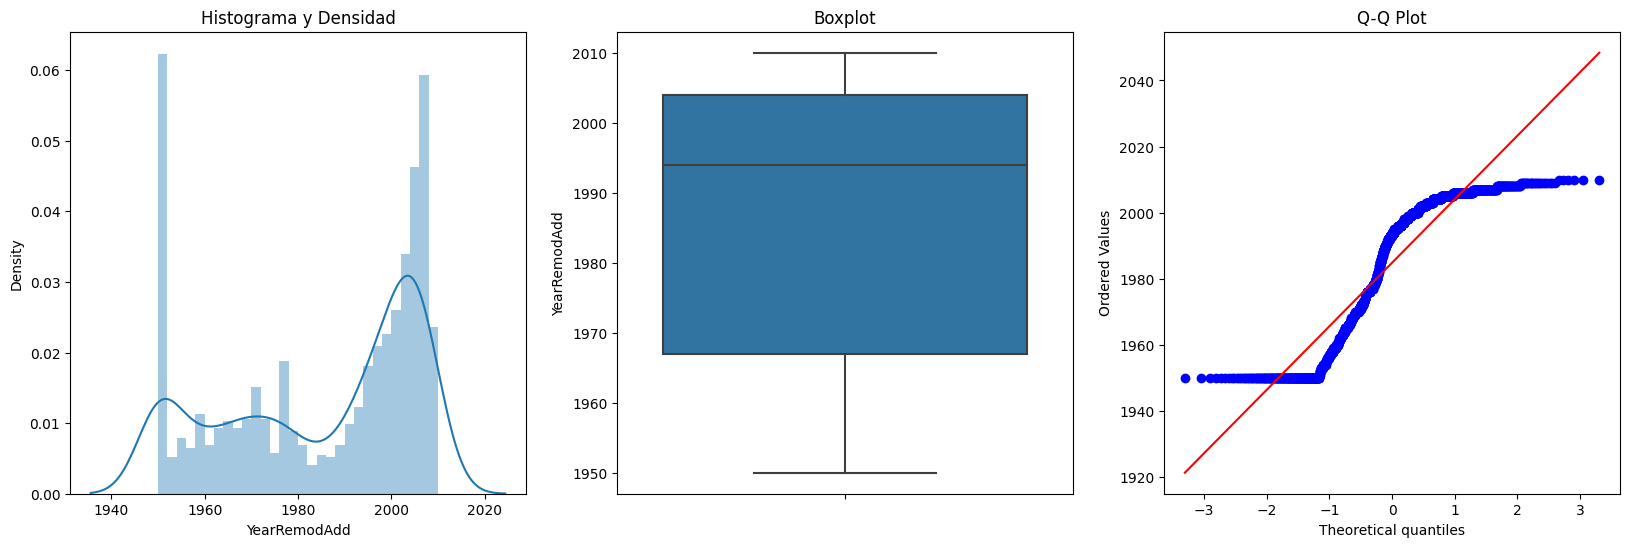

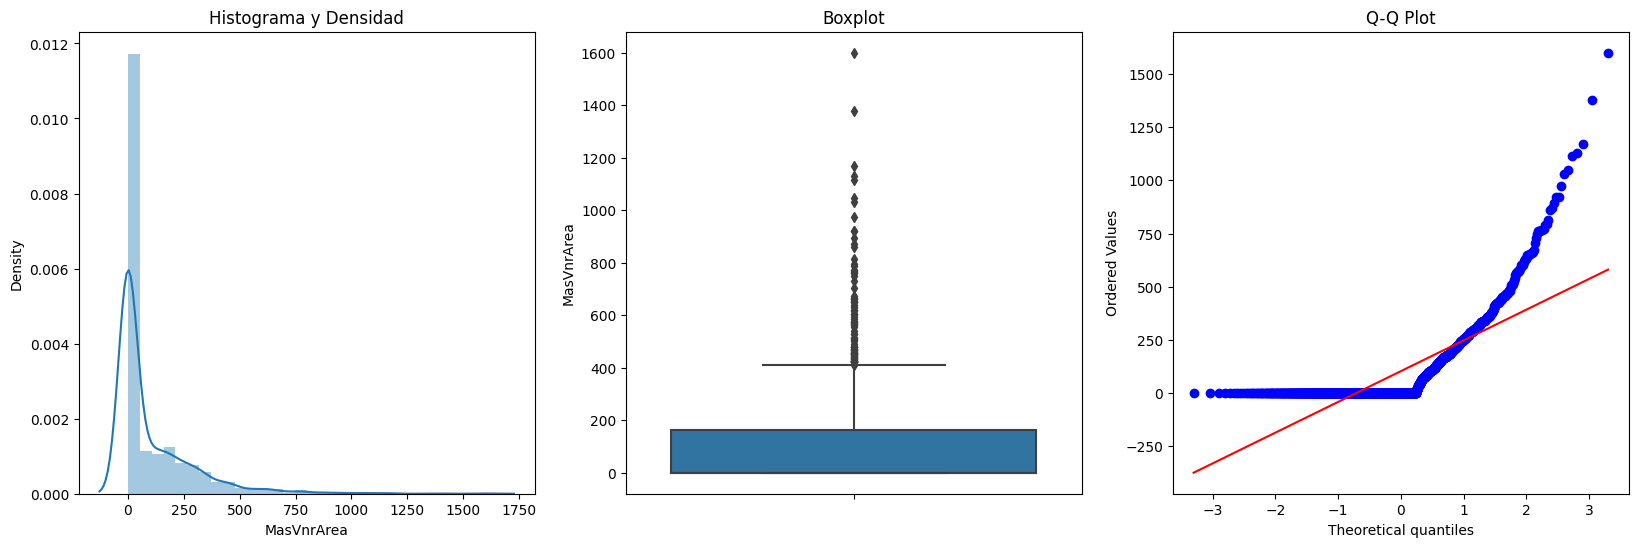

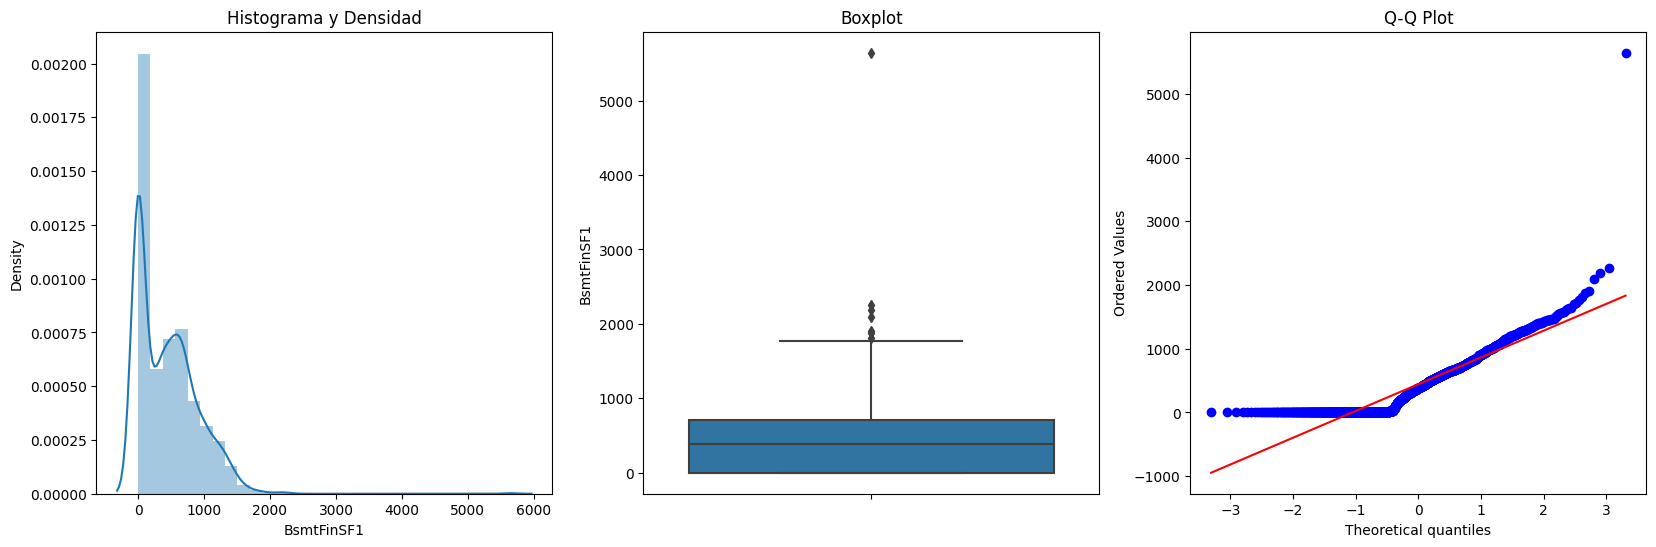

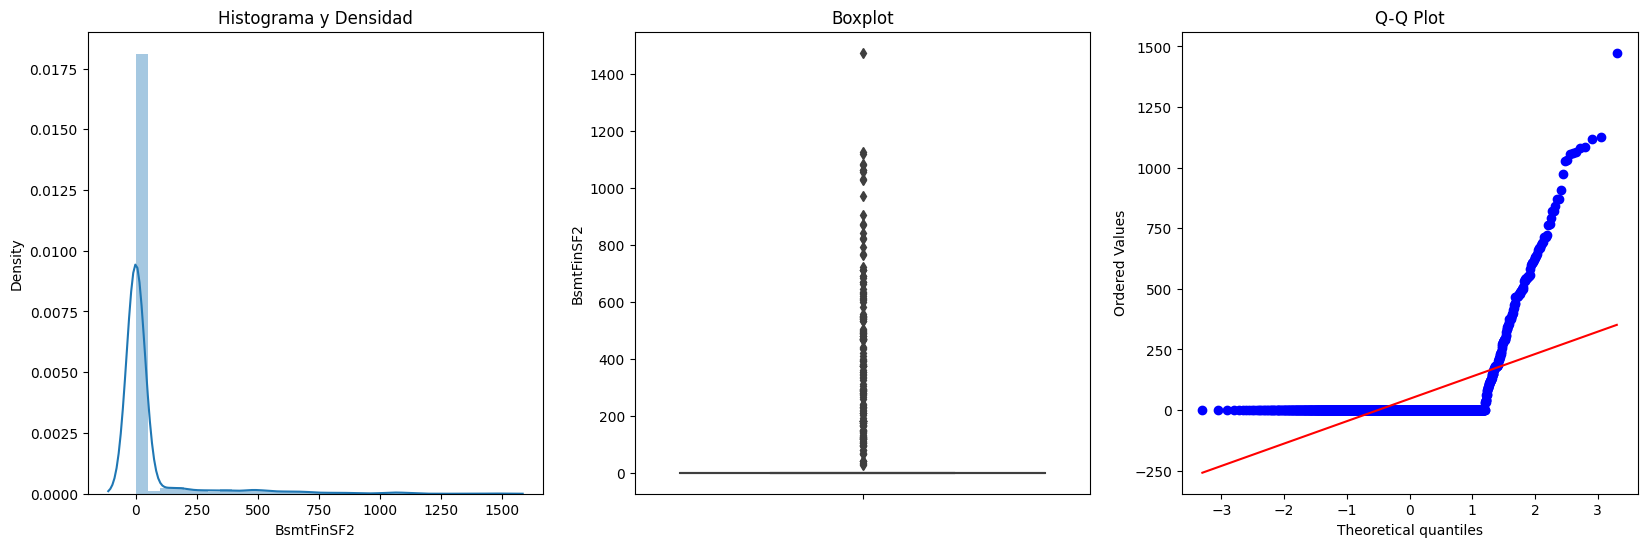

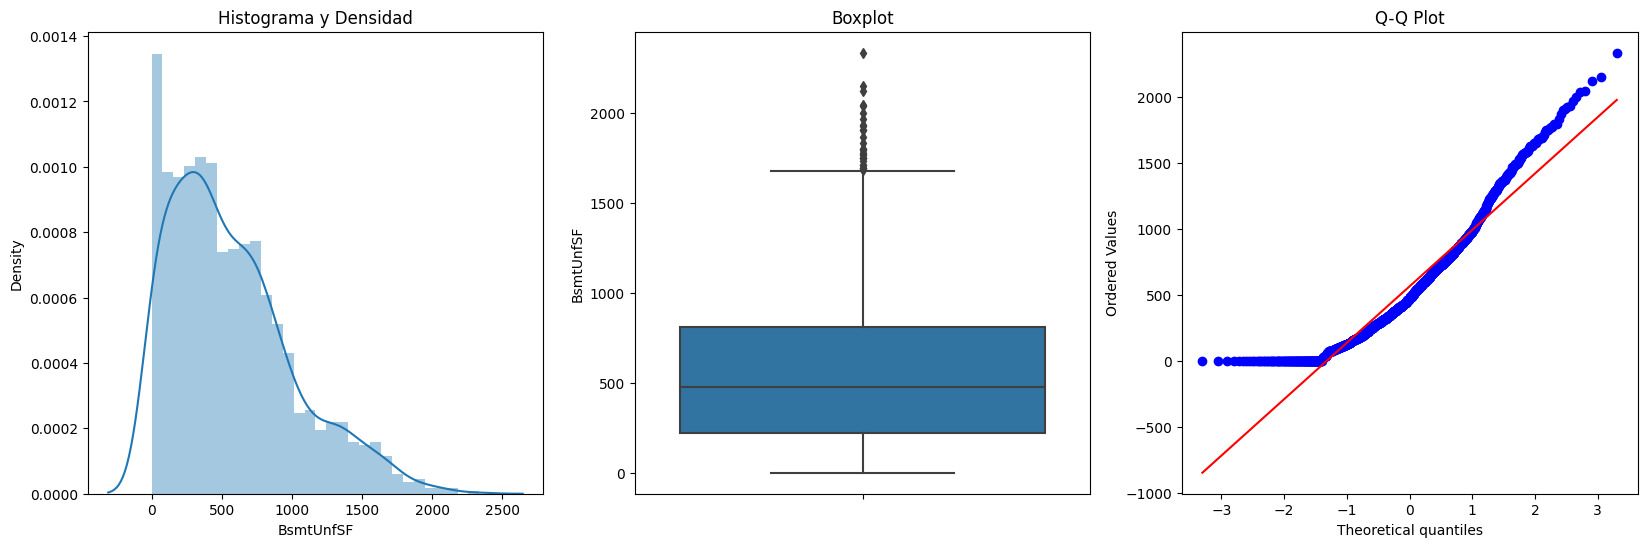

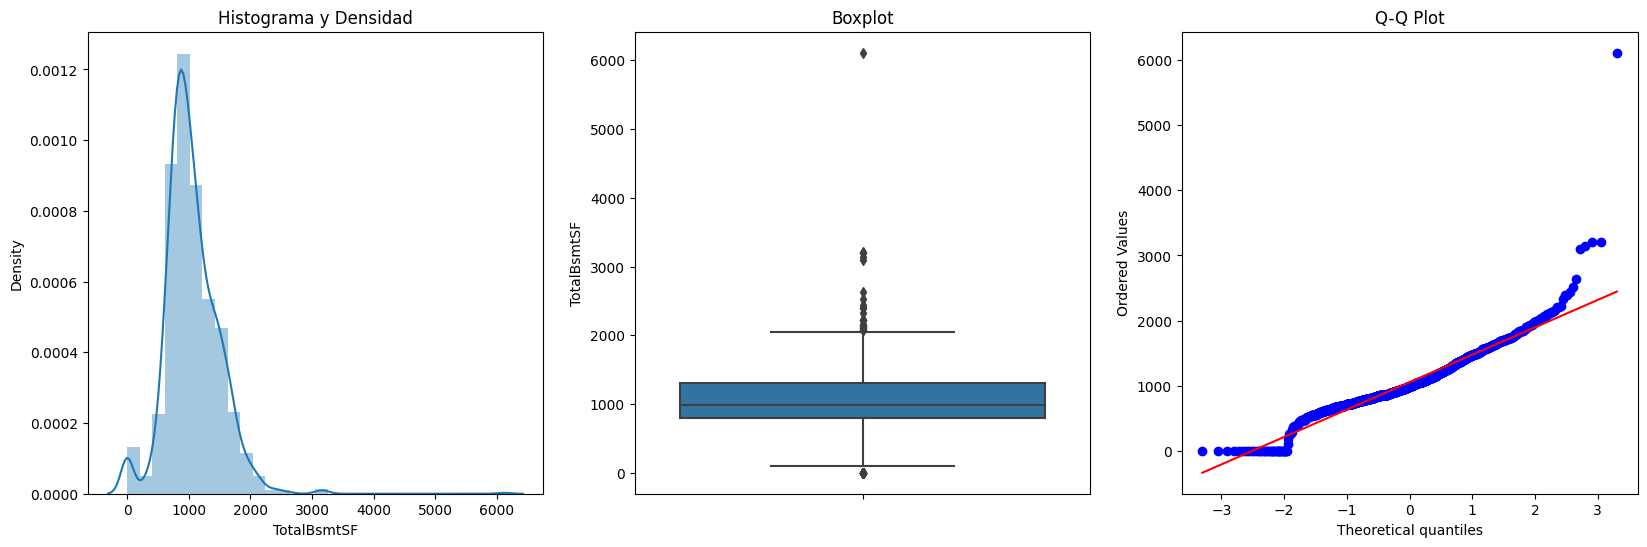

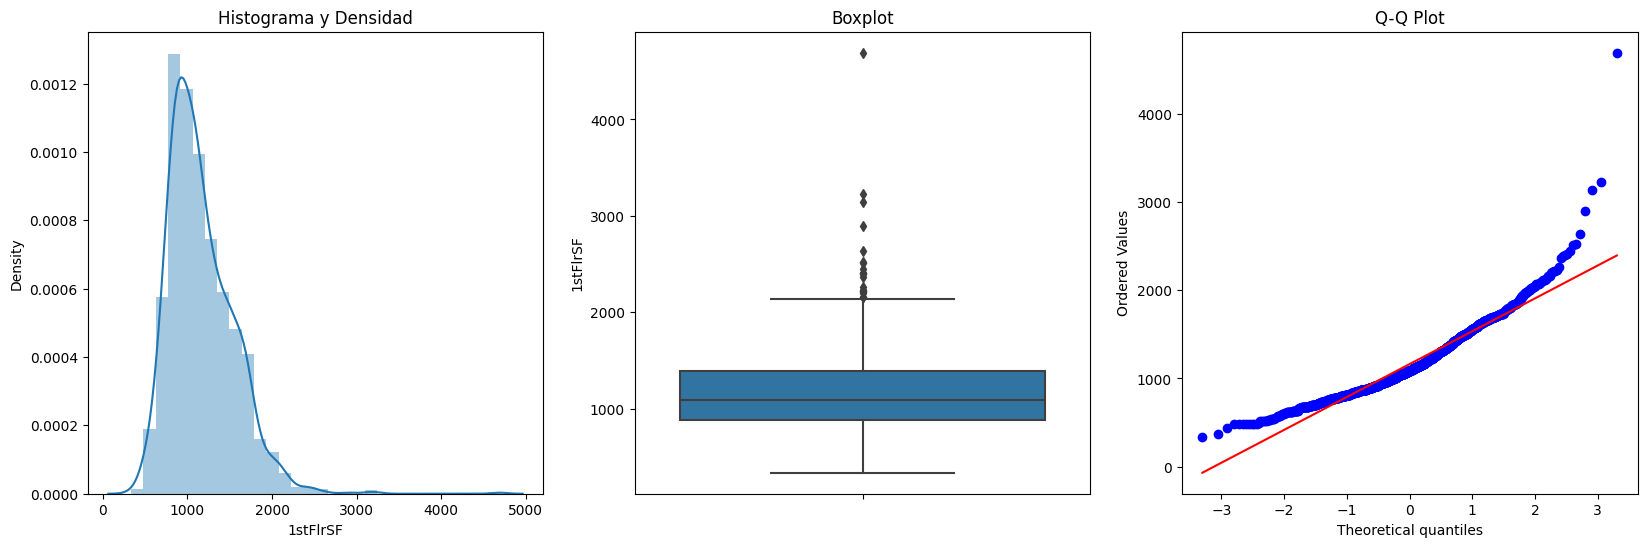

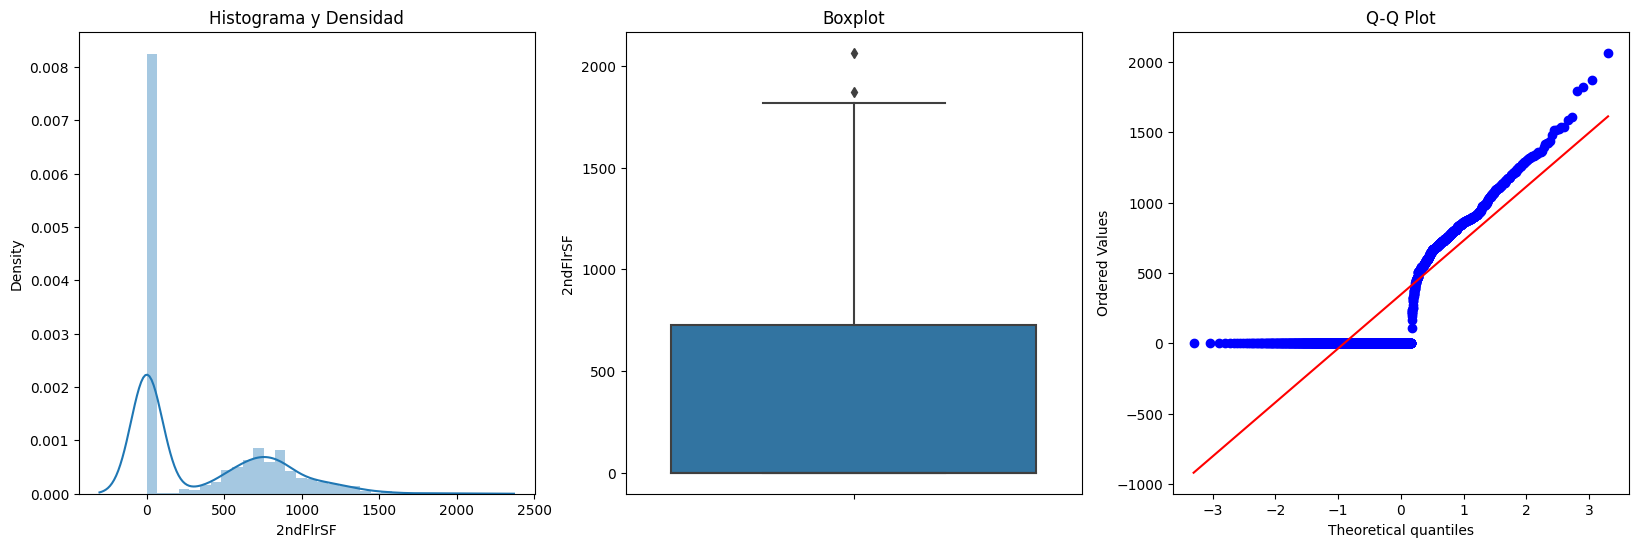

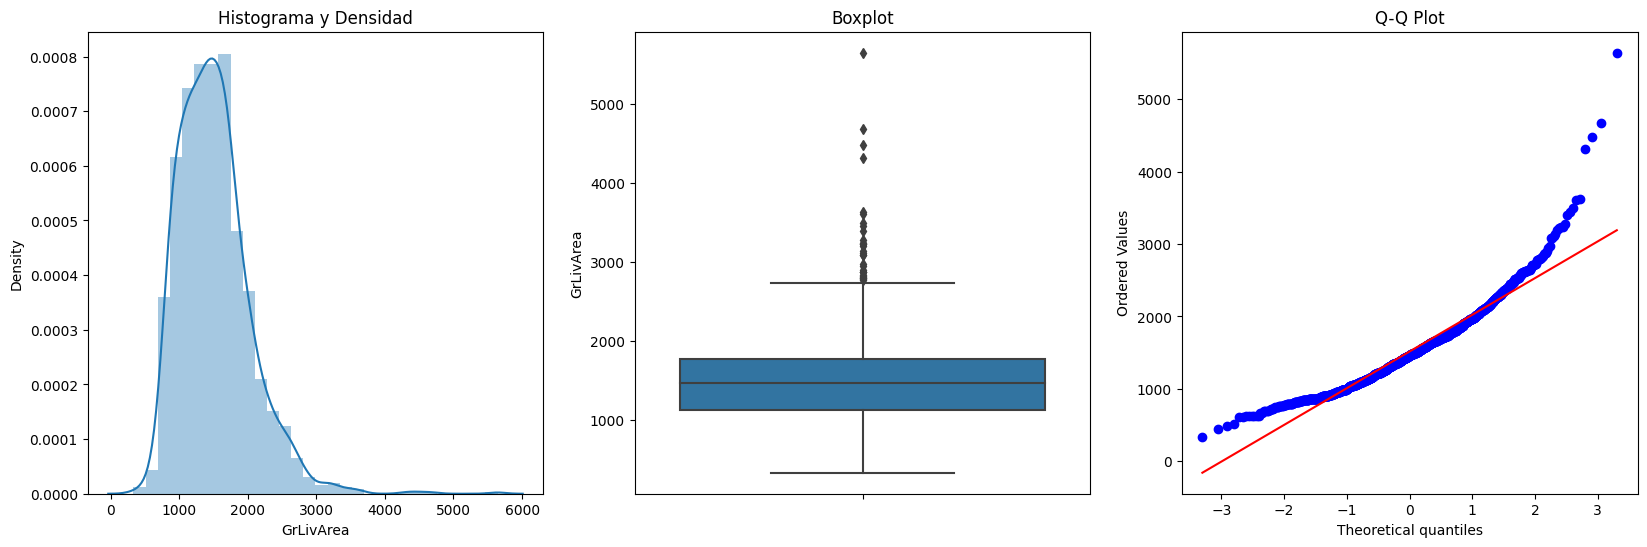

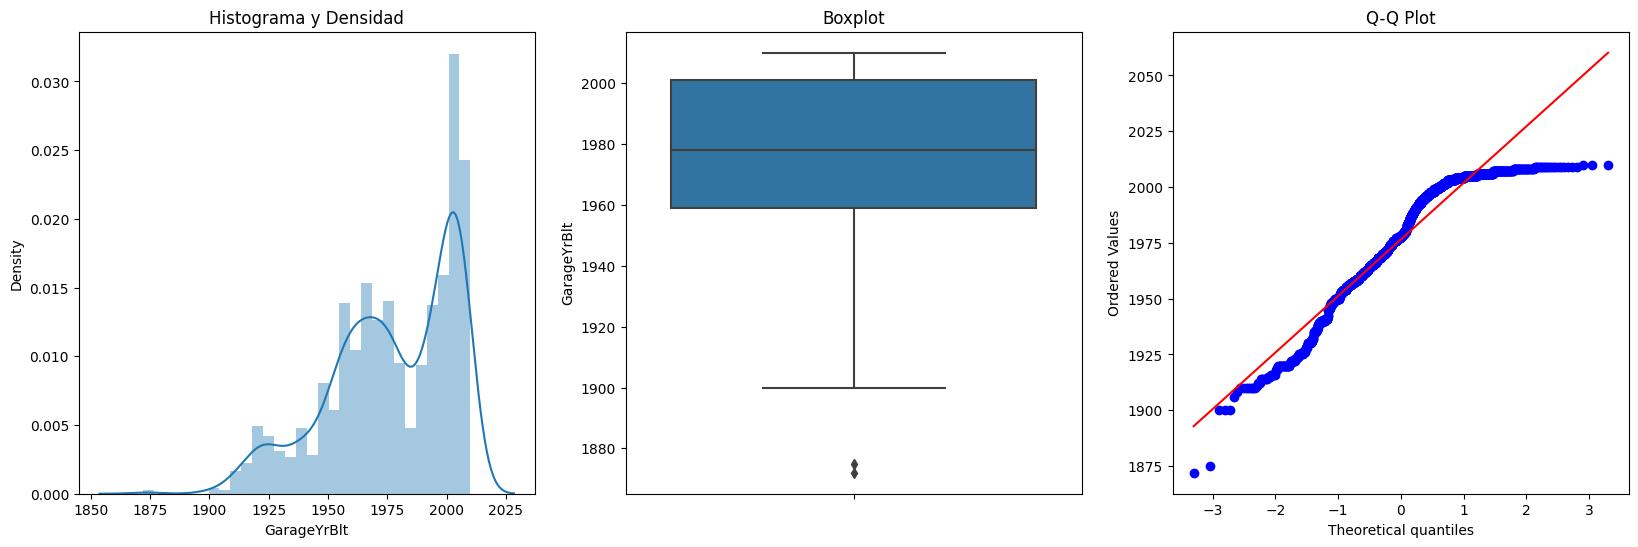

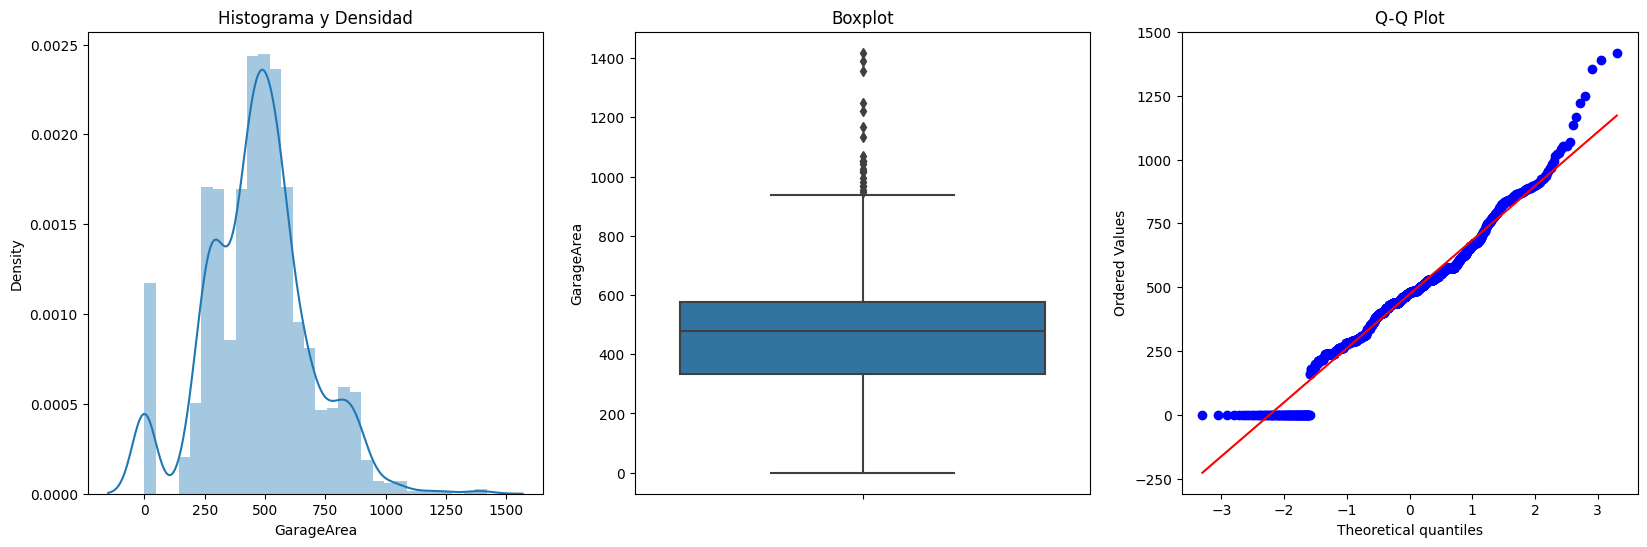

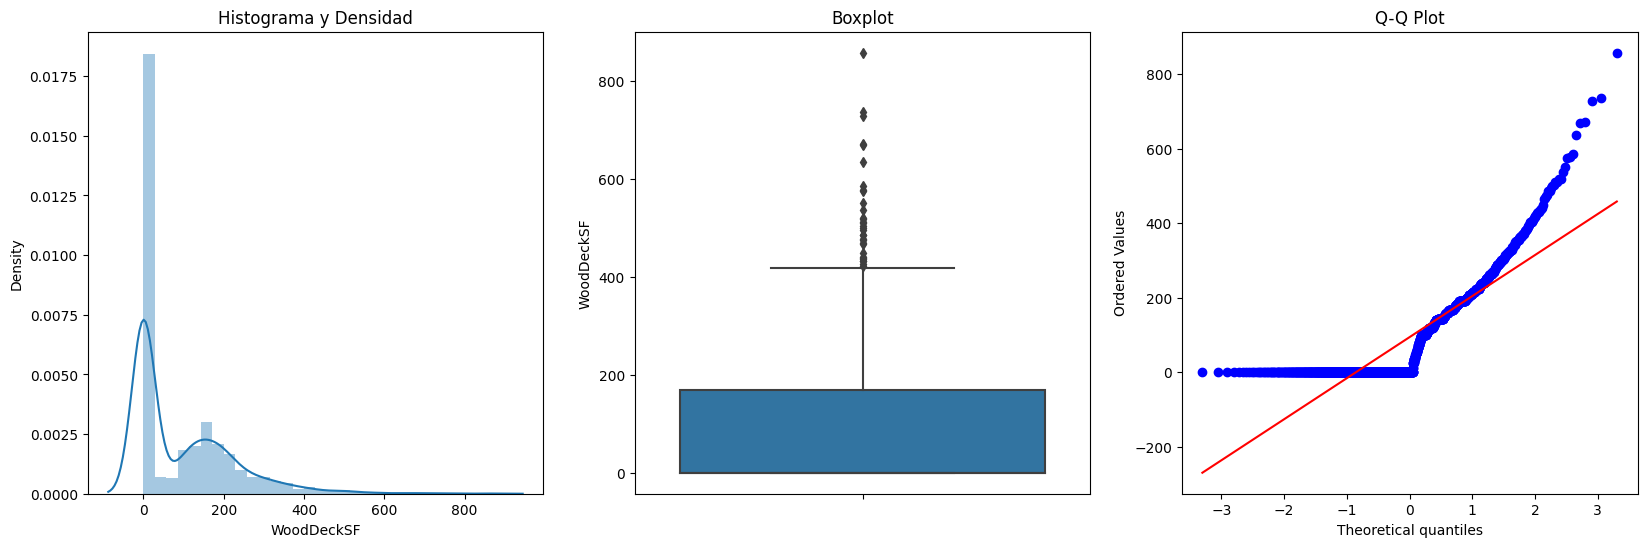

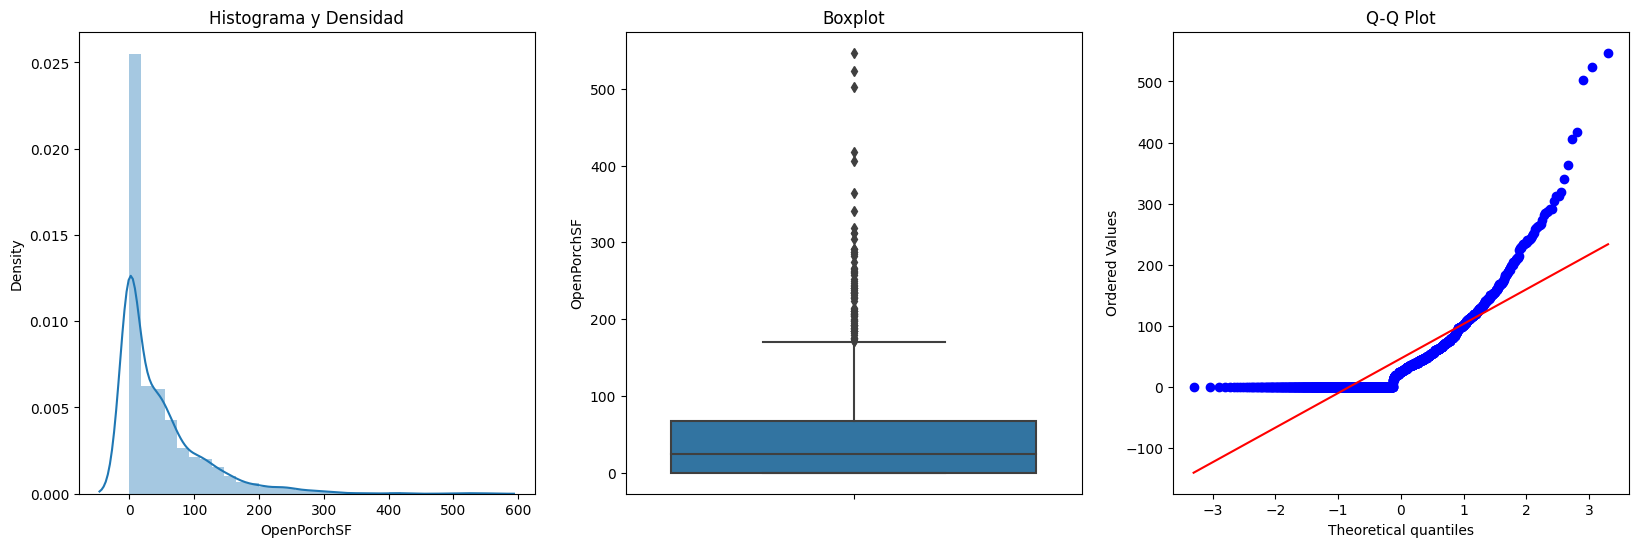

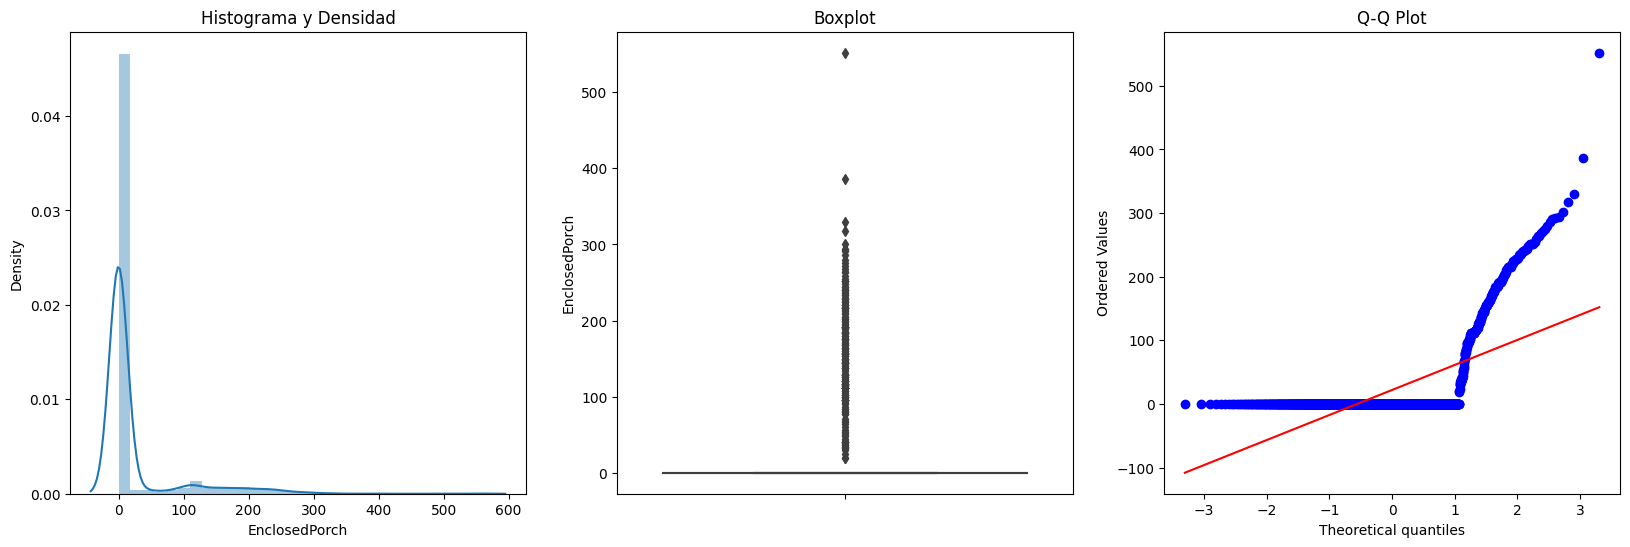

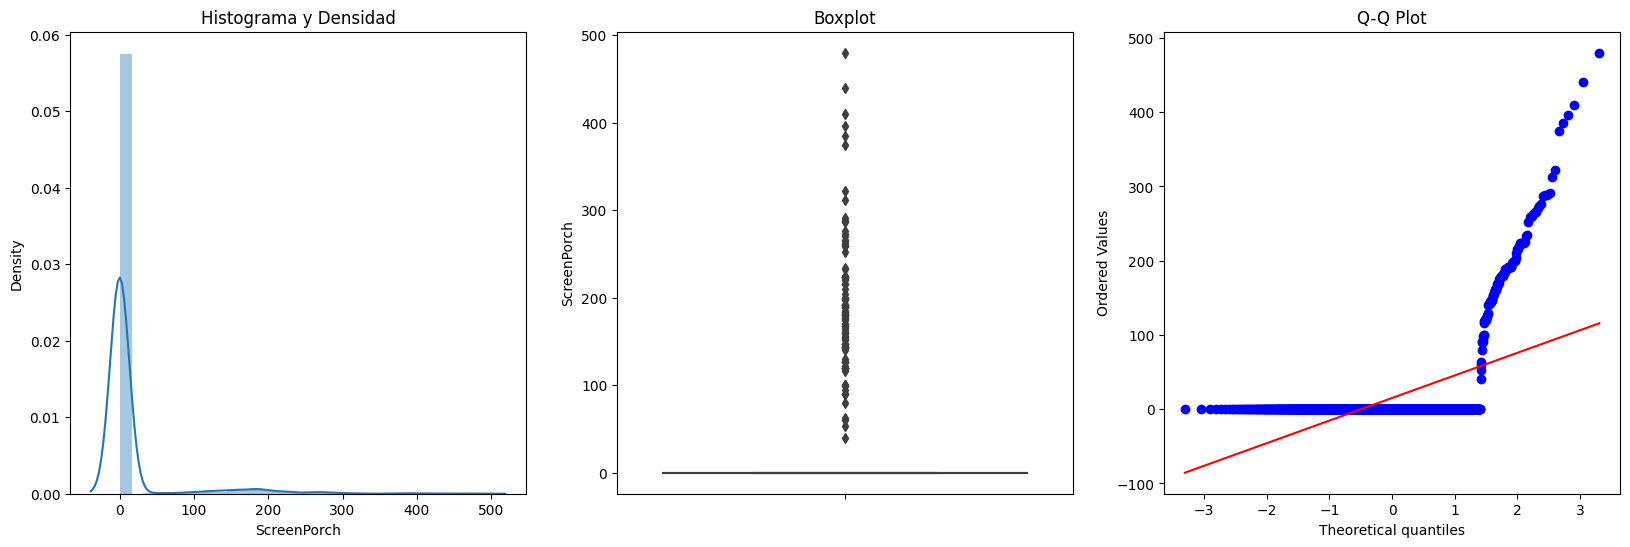

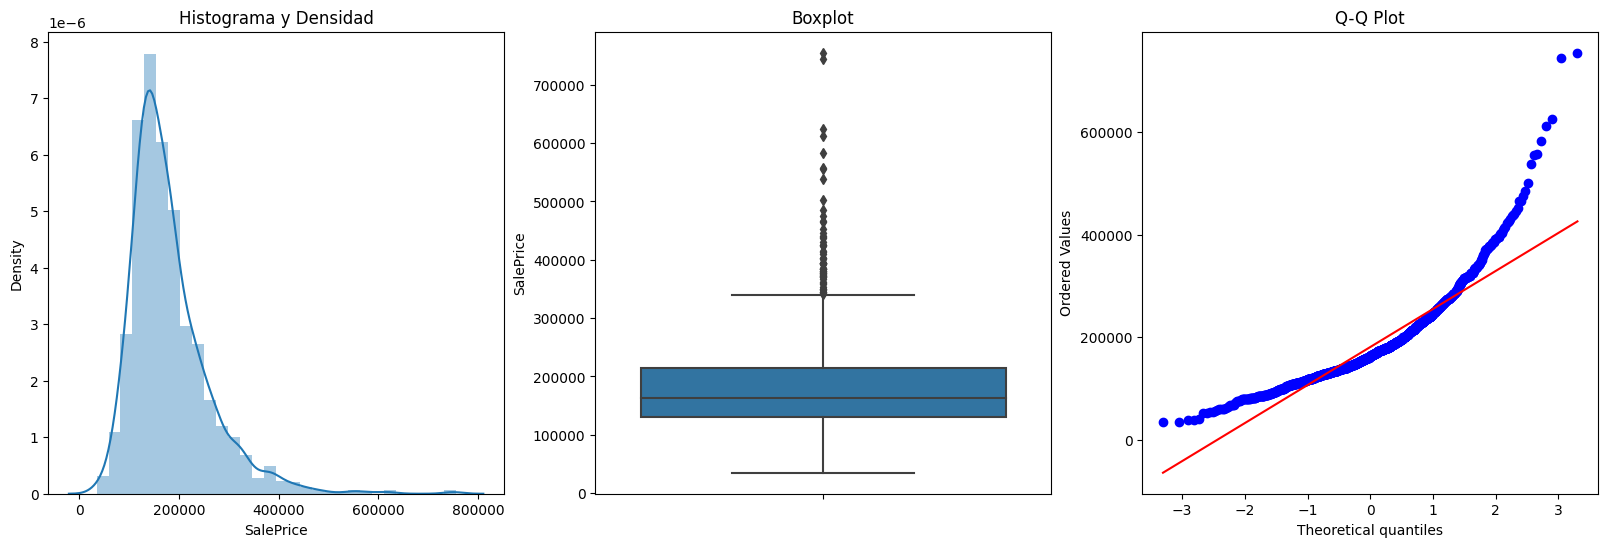

In [105]:
for continua in continuas:
    if continua != 'Id':
        plotDistBoxQQ(dataHP,continua)